In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# data
apple = pd.read_csv("apple_quality.csv")
apple.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


### 1 Data Exploration

In [3]:
apple.shape

(4001, 9)

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
apple.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


### 2 Data Preprocessing
Two issues are noticed so far: first, 'Acidity' attribute contain 4001 instances where other attributes contains 4000. Second, 'A_id' is such a useless attribute here, should drop it.

In [6]:
apple['Acidity'] = apple['Acidity'].iloc[:-1]  # Drop the last row of the 'Acidity' column
apple.drop(columns=['A_id'], inplace=True) # drop the attribute 'A_id'
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


The attribute 'Acidity' looks suspicious, it might contains mixed type values

In [7]:
apple['Acidity'].isna().sum()

1

In [8]:
apple['Acidity'] = apple['Acidity'].astype(float) # Convert 'Acidity' column to float64

In [9]:
apple.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [10]:
apple.isna().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64

In [11]:
apple.dropna(inplace=True)

In [12]:
apple["Quality"].value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

In [13]:
replacements = {
    'good':1,
    'bad':0
}
apple["Quality"].replace(replacements, inplace=True)

In [14]:
apple.corr()["Quality"].sort_values(ascending=False)

Quality        1.000000
Juiciness      0.260223
Sweetness      0.250998
Size           0.244007
Weight         0.001421
Acidity       -0.007697
Crunchiness   -0.012376
Ripeness      -0.264315
Name: Quality, dtype: float64

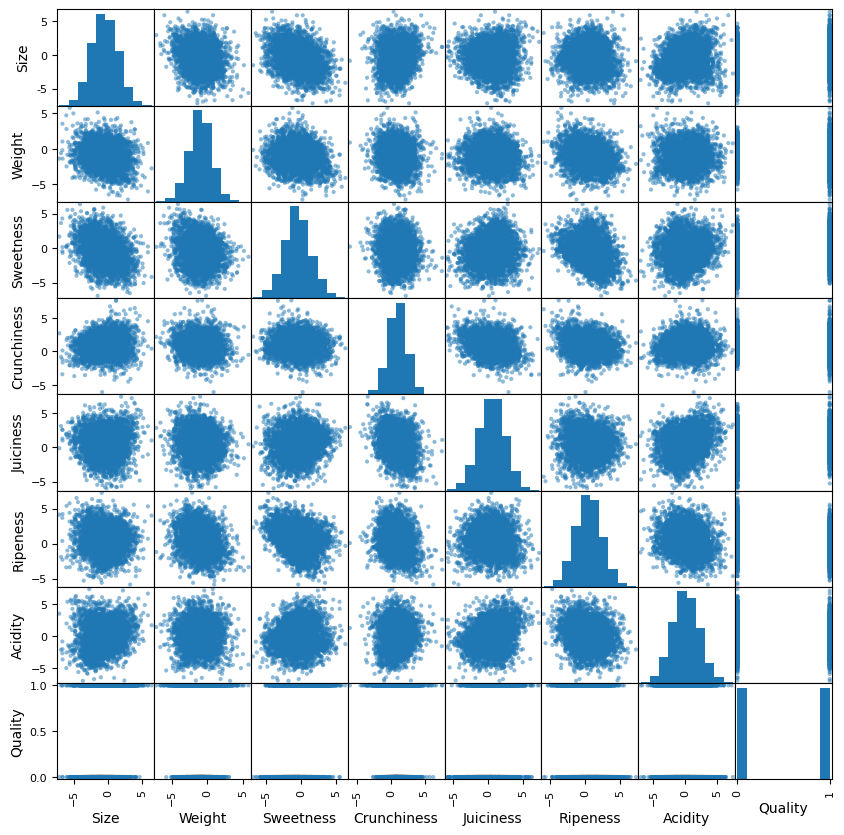

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(apple, figsize=(10,10))
plt.show()

It seems no good correlation of any attributes with the the class (Quality)

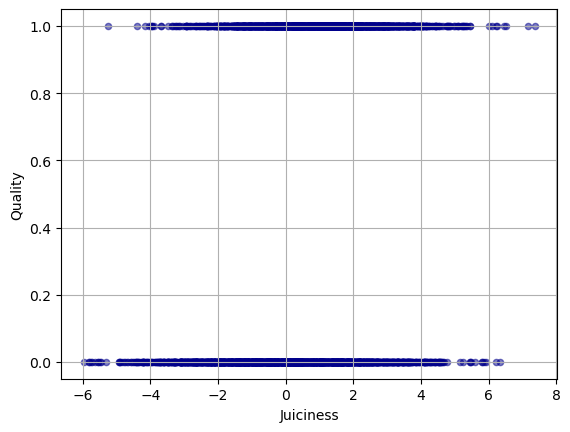

In [16]:
apple.plot(kind="scatter", x="Juiciness", y="Quality",c='DarkBlue', alpha=0.5, grid=True)
plt.show()

### 3 Feature Engineering

In [17]:
apple['Size_to_Weight_Ratio'] = apple['Size'] / apple['Weight']
apple['Juiciness_to_Sweetness_Ratio'] = apple['Juiciness'] / apple['Sweetness']
apple['Sweetness_minus_Acidity'] = apple['Sweetness'] - apple['Acidity']

apple.corr()["Quality"].sort_values(ascending=False)

Quality                         1.000000
Juiciness                       0.260223
Sweetness                       0.250998
Size                            0.244007
Sweetness_minus_Acidity         0.183747
Weight                          0.001421
Size_to_Weight_Ratio            0.000896
Acidity                        -0.007697
Juiciness_to_Sweetness_Ratio   -0.010571
Crunchiness                    -0.012376
Ripeness                       -0.264315
Name: Quality, dtype: float64

Not so good!!

In [18]:
apple.drop(columns=['Size_to_Weight_Ratio', 'Juiciness_to_Sweetness_Ratio', 'Sweetness_minus_Acidity'], inplace=True)

### 4 Split the Data
Let's split the data into train and test, and nerver look at the test data before testing

In [19]:
from sklearn.model_selection import train_test_split

X = apple.drop(columns=['Quality'])
y = apple['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

### 5 Model Selection, Training, and Evaluation on Train Data

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#### SGDClassifier

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss="log_loss", alpha=0.01, max_iter=500, n_jobs=-1, random_state=42, learning_rate='adaptive', eta0=0.1, 
                  early_stopping=True, n_iter_no_change=10, warm_start=True)
)

sgd_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.01, early_stopping=True, eta0=0.1,
                               learning_rate='adaptive', loss='log_loss',
                               max_iter=500, n_iter_no_change=10, n_jobs=-1,
                               random_state=42, warm_start=True))])

In [22]:
# cross-validation function
from sklearn.model_selection import cross_val_score

def my_cross_validation(clf):
    print(cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())

In [23]:
my_cross_validation(sgd_clf)

0.7484375


Seems the SGDClassifier model underfit the, as expected beacuse of the data structure.

In [24]:
from sklearn.preprocessing import PolynomialFeatures

sgd_clf_with_poly_feature = make_pipeline(
    PolynomialFeatures(degree=5, include_bias=False),
    StandardScaler(),
    SGDClassifier(loss="log_loss", alpha=0.01, max_iter=500, n_jobs=-1, random_state=42, learning_rate='adaptive', eta0=0.1, 
                  early_stopping=True, n_iter_no_change=10, warm_start=True)
)

my_cross_validation(sgd_clf_with_poly_feature)

0.8909374999999999


Wow!! Not bad. Let's try some other models.

#### Support Vector Classification

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

svm_poly_clf = make_pipeline(
    MinMaxScaler(),
    SVC(C=0.01, kernel='poly', degree=3, max_iter=10000, gamma=5, probability=True, random_state=42)
)
my_cross_validation(svm_poly_clf)

0.8462500000000001


In [26]:
svm_rbf_clf = make_pipeline(
    StandardScaler(),
    SVC(C=0.01, kernel='rbf', max_iter=10000, gamma=5,random_state=42)
)
my_cross_validation(svm_rbf_clf)

0.5009375


#### KNeighborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=50, n_jobs=-1)
)
my_cross_validation(knn_clf)

0.8828125


#### DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, max_features="log2", random_state=42)
)
my_cross_validation(tree_clf)

0.7965625


In [29]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

def my_classification_report_on_train_data(clf):
    y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    cr = classification_report(y_train, y_train_pred)
    print(cr)

In [30]:
my_classification_report_on_train_data(tree_clf)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1597
           1       0.80      0.80      0.80      1603

    accuracy                           0.80      3200
   macro avg       0.80      0.80      0.80      3200
weighted avg       0.80      0.80      0.80      3200



Most of the model is underfitting. Let's try combination some powerfull model.

#### VotingClassifier

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

voting_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    VotingClassifier(
        estimators=[
            ('sgd', SGDClassifier(loss="log_loss", max_iter=500, n_jobs=-1, random_state=42, learning_rate='adaptive', eta0=0.1, 
                  early_stopping=True, n_iter_no_change=10)),
            ('lr', LogisticRegression(C=0.1, random_state=42, n_jobs=-1)),
            ('dt', DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, max_features="log2", random_state=42))
        ],
        voting='soft'
    )
)

my_cross_validation(voting_clf)

0.8912500000000001


#### BaggingClassifier

In [32]:
from sklearn.ensemble import BaggingClassifier

bag_clf = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, max_features="log2", random_state=42),
        n_estimators=100,
        n_jobs=-1,
        random_state=42
    )
)
my_cross_validation(bag_clf)

0.87625


#### Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(max_depth=10, n_estimators=50, learning_rate=0.1, n_iter_no_change=10 ,random_state=42)
)
my_cross_validation(gb_clf)

0.8568749999999999


#### RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, n_jobs=-1, random_state=42)
)
my_cross_validation(rnd_clf)

0.8471875000000001


#### StackingClassifier

In [35]:
from sklearn.ensemble import StackingClassifier

stacking_clf = make_pipeline(
    StandardScaler(),
    StackingClassifier(
        estimators=[
            ('sgd', SGDClassifier(loss="log_loss",  max_iter=500, n_jobs=-1, random_state=42, learning_rate='adaptive', eta0=0.1, 
                  early_stopping=True, n_iter_no_change=10)),
            ('lr', LogisticRegression(C=0.1, random_state=42, n_jobs=-1)),
            ('dt', DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, max_features="log2", random_state=42))
        ],
        final_estimator= RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, n_jobs=-1, random_state=42),
        cv= 3
    )
)
my_cross_validation(stacking_clf)

0.809375


#### Precision vs Recall Curve

In [73]:
from sklearn.metrics import precision_recall_curve

def my_precision_vs_recall_curves(clfs, clf_labels):
    plt.figure(figsize=(10, 5))

    for clf, label in zip(clfs, clf_labels):
        y_score = cross_val_predict(clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]
        precision, recall, _ = precision_recall_curve(y_train, y_score)
        plt.plot(precision, recall, label=label, linewidth=2, linestyle='solid')

    plt.title("Precision vs Recall Curves")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

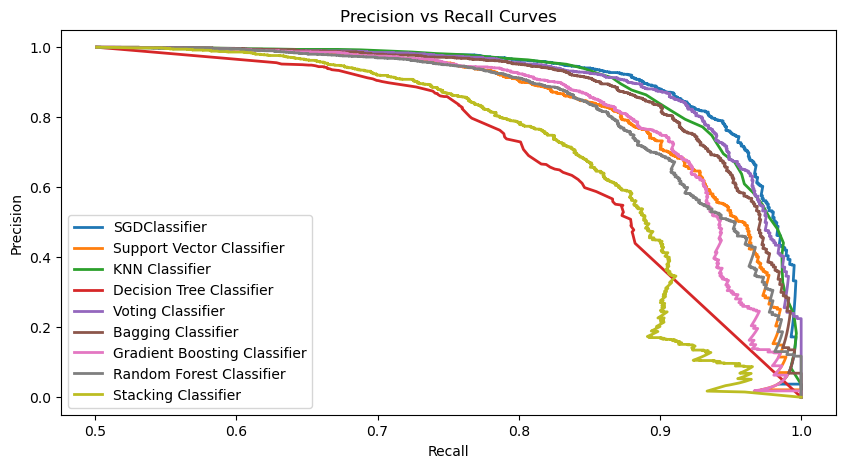

In [74]:
clfs = [sgd_clf_with_poly_feature, svm_poly_clf, knn_clf, tree_clf, voting_clf, bag_clf, gb_clf, rnd_clf, stacking_clf]
clf_labels = ["SGDClassifier", "Support Vector Classifier", "KNN Classifier", "Decision Tree Classifier", 
              "Voting Classifier", "Bagging Classifier", "Gradient Boosting Classifier", 
              "Random Forest Classifier", "Stacking Classifier"]

my_precision_vs_recall_curves(clfs, clf_labels)

#### The ROC Curves

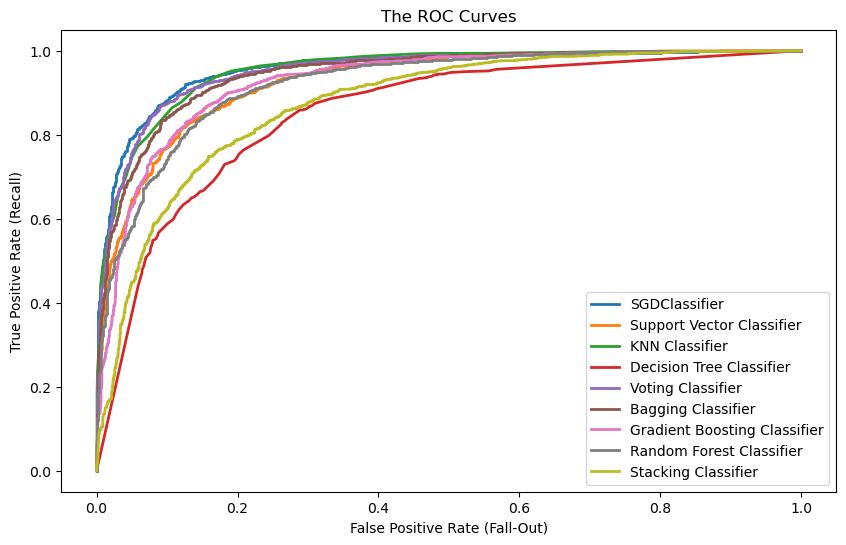

In [41]:
from sklearn.metrics import roc_curve

def my_roc_curves(clfs, clf_labels):
    plt.figure(figsize=(10, 6))

    for clf, label in zip(clfs, clf_labels):
        if hasattr(clf, "predict_proba"): # For classifiers without decision_function, use predict_proba
            y_score = cross_val_predict(clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]
        else:
            y_score = cross_val_predict(clf, X_train, y_train, cv=3, method="decision_function")

        fpr, tpr, _ = roc_curve(y_train, y_score)
        plt.plot(fpr, tpr, label=label, linewidth=2, linestyle='solid')

    plt.title("The ROC Curves")
    plt.xlabel("False Positive Rate (Fall-Out)")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend()
    plt.show()
    
my_roc_curves(clfs, clf_labels)

### 6 Select Best Model, and Tune Hyperparameters
So far, SGDClassifer fits the train data most out of 9 models. Let's find the best parameters for this model.

##### Randomized Search

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# preprocessing
pre_pipeline = make_pipeline(
    PolynomialFeatures(degree=5, include_bias=False),
    StandardScaler()
)
preprocessing = make_column_transformer((pre_pipeline, make_column_selector(dtype_include=[np.number])))

# model
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("sgd_clf", SGDClassifier(loss="log_loss", alpha=0.01, max_iter=500, n_jobs=-1, random_state=42, eta0=0.1, n_iter_no_change=10))
])

# hyperparameters
param_distributions = {
    'sgd_clf__loss': ['log_loss', 'perceptron', 'squared_error'],
    'sgd_clf__alpha': uniform(loc=1e-4, scale=0.0099),  # loc is the starting point, scale is the range
    'sgd_clf__eta0': uniform(loc=1e-3, scale=0.098),
    'sgd_clf__n_iter_no_change': randint(low=5, high=20)
}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distributions, n_iter=20, cv=3, 
    scoring='accuracy', random_state=42
)

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('polynomialfeatures',
                                                                                                PolynomialFeatures(degree=5,
                                                                                                                   include_bias=False)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000015BE2AB15B0>)])),
                                             ('sgd_clf',
                                              SGDClassifier(...
                   param_distributions={'sgd_clf__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000015BE2AB1490>,
                                        'sgd_clf__eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000015BE2AB1A00>,
                                        'sgd_clf__loss': ['log_loss',
                                                          'perceptron',
                                                          'squared_error'],
                                        'sgd_clf__n_iter_no_change': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000015BE333EB20>},
                   random_state=42, scoring='accuracy')

In [62]:
rnd_search.best_params_

{'sgd_clf__alpha': 0.005908836540072098,
 'sgd_clf__eta0': 0.09559502011188553,
 'sgd_clf__loss': 'log_loss',
 'sgd_clf__n_iter_no_change': 13}

In [64]:
rnd_search_result = pd.DataFrame(rnd_search.cv_results_).sort_values(by="mean_test_score",ascending=False)
rnd_search_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgd_clf__alpha,param_sgd_clf__eta0,param_sgd_clf__loss,param_sgd_clf__n_iter_no_change,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
19,0.308955,0.018521,0.020916,0.001949,0.005909,0.095595,log_loss,13,"{'sgd_clf__alpha': 0.005908836540072098, 'sgd_...",0.914714,0.887535,0.893058,0.898436,0.011729,1
9,0.360226,0.020337,0.018079,0.002525,0.001788,0.007375,log_loss,16,"{'sgd_clf__alpha': 0.0017881888245041863, 'sgd...",0.909091,0.892221,0.891182,0.897498,0.008208,2
13,0.278109,0.008705,0.016011,0.005630,0.002662,0.065927,perceptron,18,"{'sgd_clf__alpha': 0.0026619218178401674, 'sgd...",0.895970,0.902530,0.888368,0.895623,0.005787,3
5,0.227416,0.037630,0.020201,0.000104,0.006155,0.001692,log_loss,5,"{'sgd_clf__alpha': 0.006155366288833982, 'sgd_...",0.904405,0.887535,0.892120,0.894687,0.007122,4
4,0.629116,0.076699,0.013532,0.004581,0.000108,0.098237,log_loss,16,"{'sgd_clf__alpha': 0.00010770978182604186, 'sg...",0.905342,0.883786,0.893058,0.894062,0.008829,5


In [65]:
# let's define the final model
final_model = rnd_search.best_estimator_
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('polynomialfeatures',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015BDF826550>)])),
                ('sgd_clf',
                 SGDClassifier(alpha=0.005908836540072098,
                               eta0=0.09559502011188553, loss='log_loss',
                               max_iter=500, n_iter_no_change=13, n_jobs=-1,
                               random_state=42))])

#### 7 Model Evaluation on Test Data

In [66]:
y_pred = final_model.predict(X_test)
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       399
           1       0.88      0.90      0.89       401

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



#### Confusion Matrix

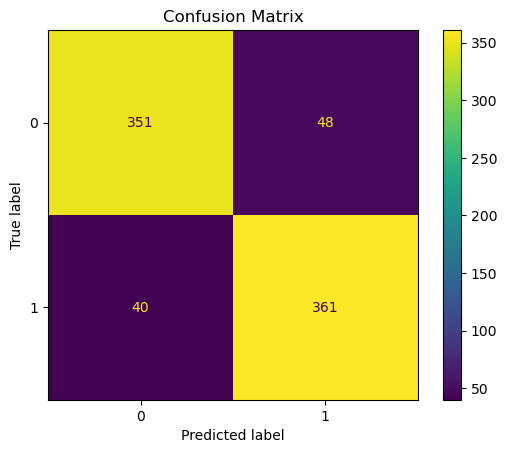

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

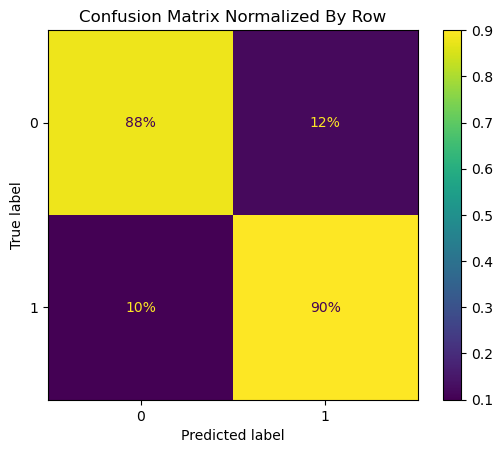

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true", values_format=".0%")
plt.title("Confusion Matrix Normalized By Row")
plt.show()

For real life project, it is important for the model to classify both classes perfectly except some rare cases. However, as adding more data is not feasible, let's continue further.

### 8 Launch The Model

In [69]:
# saving the model using joblib
import joblib
joblib.dump(final_model, "apple_quality_classifier_model.pkl")

['apple_quality_classifier_model.pkl']

In [72]:
# load the model
mymodel = joblib.load("apple_quality_classifier_model.pkl")
mymodel.predict(X_test[0:5])

array([1, 0, 0, 1, 1], dtype=int64)

### The End
### --------------------------------------------------------------------------------------------------------------------------------------------------------------